In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action="once")
from multiprocessing import  Pool

sns.set_style("darkgrid", {'xtick.top': True, 'ytick.right': True,'xtick.bottom': True, 'ytick.left': True,'grid.linestyle': '--','image.cmap': 'viridis','xtick.direction': 'in', 'ytick.direction': 'in'})

# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'


# @global settings

FIG_DPI      = 800
FIG_EXT      = '.pdf'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)
        
def parallelize_dataframe(n_cores, func, df, *args):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.starmap(func, [(d,*args) for d in df_split]))
    pool.close()
    pool.join()
    return df

def parallelize(n_cores, func, splited_data, *args):
    pool = Pool(n_cores)
    df = pool.starmap(func, [(d,*args) for d in splited_data])
    pool.close()
    pool.join()
    return df

Populating the interactive namespace from numpy and matplotlib


In [20]:
def draw_errors(data, method):
    test_num = len(data)
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(1, 1, 1)
    for d, m in zip(data, method):
        ax.plot(d['time'], np.abs(d['$E_{tot}$']),'-.', lw=1,label=m)
        ax.set_yscale('log')
        ax.set_xlabel('time')
        ax.set_ylabel('$\Delta E$')
        print(np.abs(d['$E_{tot}$']).mean())
    ax.legend()
    

4.4874127922e-15


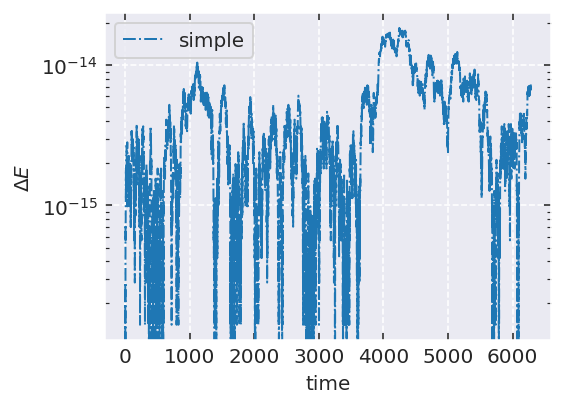

In [31]:
#method = ['simple', 'chain', 'regu', 'archain']
method = ['simple']
fnames = ['cmake-build-debug/circular-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)
#print(data)

1.75076112518e-12


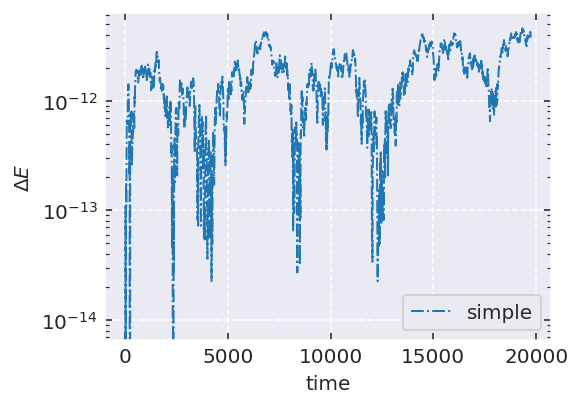

In [153]:
fnames = ['cmake-build-debug/ecc-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)

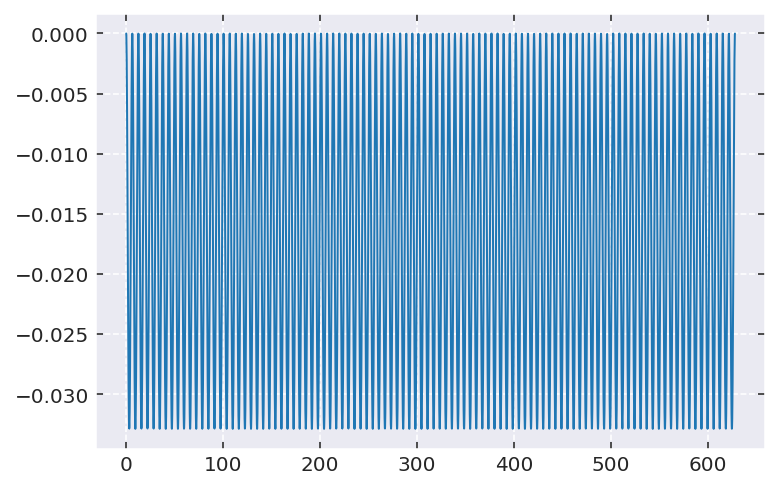

In [146]:
do = (energy['omega'] - energy['omega'][0])/energy['omega'][0]
plt.plot(energy['time'], do,'-', lw=1)


In [66]:
from decimal import *
getcontext().prec = 44

sub_steps = ['0', '0.0562625605369221464656521910318', '0.180240691736892364987579942780', '0.352624717113169637373907769648', '0.547153626330555383001448554766', '0.734210177215410531523210605558', '0.885320946839095768090359771030', '0.977520613561287501891174488626', '1']
p_step = [Decimal(h) for h in sub_steps]

def gen_c(p_step):
    l=[]
    size = len(p_step)
    for i in range(size):
        x =[]
        for j in range(i):
            x.append(Decimal(1))
            for k in range(len(x)):
                x[k]=x[k]/(p_step[i]-p_step[j])
        l.append(x)
            
    return l

def gen_r(p_step):
    l=[]
    size = len(p_step)
    for i in range(size):
        x =[]
        for j in range(i):
            x.append(1/(p_step[i]-p_step[j]))
        l.append(x)
            
    return l
        
l = gen_r(p_step) 

for i in p_step:
    print("{:.18E}".format(i),',',end='')
    
for i in l:
    for x in i:
        print("{:.18E}".format( x),',',end='')
    print('\n')
    
    
pos_cof = [Decimal(1.0), Decimal(1)/Decimal(2), Decimal(1)/Decimal(3), Decimal(1)/Decimal(2), Decimal(3)/Decimal(5), Decimal(2)/Decimal(3), Decimal(5)/Decimal(7), Decimal(3)/Decimal(4), Decimal(7)/Decimal(9)]
vel_cof = [Decimal(1.0), Decimal(1)/Decimal(2), Decimal(2)/Decimal(3), Decimal(3)/Decimal(4), Decimal(4)/Decimal(5), Decimal(5)/Decimal(6), Decimal(6)/Decimal(7), Decimal(7)/Decimal(8)]

def tab(h, cof):
    s = 1
    for x in cof:
        print("{:.18E}".format( s*x*h),',',end='')
        s*=x*h

for p in p_step:
    if p != 0:
        print(Decimal(1)/p)


for p in p_step:
    tab(p, vel_cof)
    print('\n')
    


0.000000000000000000E+18 ,5.626256053692214647E-2 ,1.802406917368923650E-1 ,3.526247171131696374E-1 ,5.471536263305553830E-1 ,7.342101772154105315E-1 ,8.853209468390957681E-1 ,9.775206135612875019E-1 ,1.000000000000000000E+0 ,

1.777380891407800084E+1 ,

5.548136718537216506E+0 ,8.065938648381886689E+0 ,

2.835876078644438678E+0 ,3.374249976962635260E+0 ,5.801001559264061482E+0 ,

1.827640267517597830E+0 ,2.037111835358584783E+0 ,2.725442211808226284E+0 ,5.140624105810934229E+0 ,

1.362007816062469497E+0 ,1.475040217560411548E+0 ,1.805153580140251260E+0 ,2.620644926387035081E+0 ,5.345976899871107514E+0 ,

1.129533875336789903E+0 ,1.206187666058445617E+0 ,1.418278263734739154E+0 ,1.877242496186810097E+0 ,2.957116017290455748E+0 ,6.617662013702424487E+0 ,

1.022996329823486746E+0 ,1.085472193938642384E+0 ,1.254264622281877766E+0 ,1.600266549490816261E+0 ,2.323598300219694223E+0 ,4.109975778344559086E+0 ,1.084602619023684468E+1 ,

1.000000000000000000E+0 ,1.059616751634789122E+0 ,1.219870

In [91]:
110000/3600

0.123/2/np.pi

0.019576058000303126